In [1]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("drowsiness_detection_model_v2.h5")


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import itertools


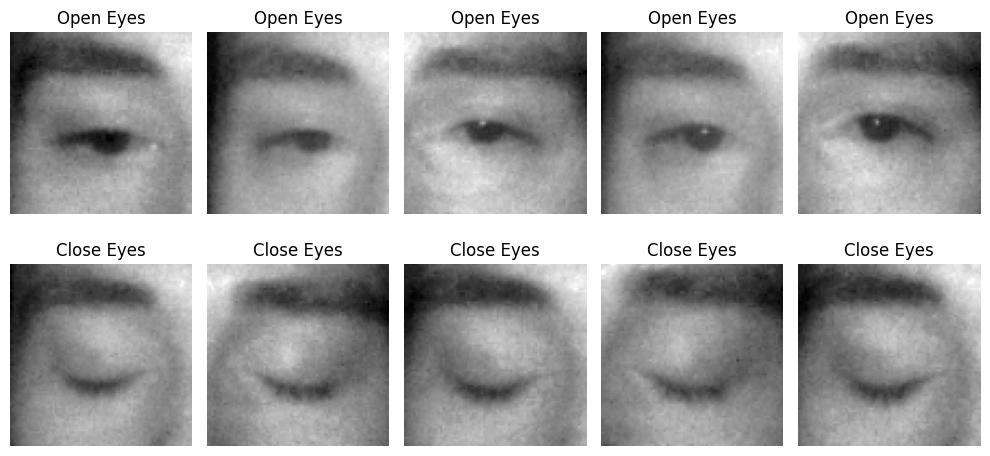

In [4]:
# Define data directories
data_dir = "data/"
open_eye_dir = os.path.join(data_dir, 'Open-Eyes')
close_eye_dir = os.path.join(data_dir, 'Close-Eyes')

# Display some sample images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
open_eye_images = os.listdir(open_eye_dir)[:5]
close_eye_images = os.listdir(close_eye_dir)[:5]

for i, img in enumerate(open_eye_images):
    img_path = os.path.join(open_eye_dir, img)
    axes[0, i].imshow(plt.imread(img_path), cmap='gray')
    axes[0, i].set_title("Open Eyes")
    axes[0, i].axis('off')

for i, img in enumerate(close_eye_images):
    img_path = os.path.join(close_eye_dir, img)
    axes[1, i].imshow(plt.imread(img_path), cmap='gray')
    axes[1, i].set_title("Close Eyes")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


In [5]:
batch_size = 32
img_size = (64, 64)  # Resize images for uniformity

train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 67919 images belonging to 2 classes.
Found 16979 images belonging to 2 classes.


In [6]:
# Evaluate model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


  1/531 ━━━━━━━━━━━━━━━━━━━━ 3:47 430ms/step - accuracy: 0.9375 - loss: 0.2996

C:\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


531/531 ━━━━━━━━━━━━━━━━━━━━ 84s 157ms/step - accuracy: 0.9065 - loss: 0.9165
Validation Loss: 0.8954358696937561
Validation Accuracy: 0.9061782360076904


In [7]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get true labels and predictions
validation_generator.reset()  # Reset generator to start from the first batch
y_true = validation_generator.classes  # True labels from the generator

# Get predicted probabilities and convert them to class labels
y_pred = model.predict(validation_generator)
y_pred_classes = (y_pred > 0.5).astype("int32").flatten()  # For binary classification

# Classification report
target_names = ['Closed', 'Open']  # Adjust based on your class indices
print(classification_report(y_true, y_pred_classes, target_names=target_names))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)


531/531 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step
              precision    recall  f1-score   support

      Closed       0.49      0.53      0.51      8389
        Open       0.50      0.47      0.49      8590

    accuracy                           0.50     16979
   macro avg       0.50      0.50      0.50     16979
weighted avg       0.50      0.50      0.50     16979

Confusion Matrix:
 [[4407 3982]
 [4543 4047]]


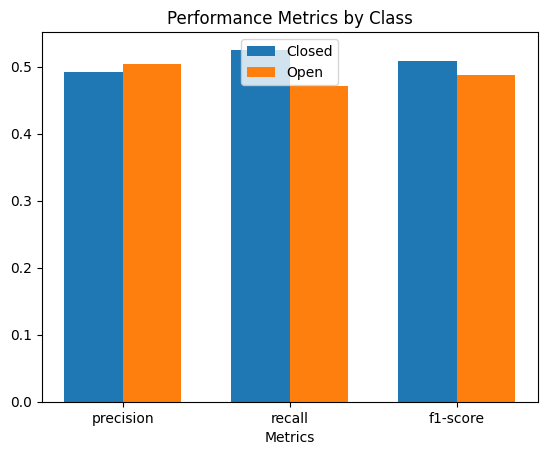

In [8]:
import matplotlib.pyplot as plt

# Extract metrics from classification report
report = classification_report(y_true, y_pred_classes, target_names=target_names, output_dict=True)
closed_metrics = report['Closed']
open_metrics = report['Open']

# Metrics to plot
metrics = ['precision', 'recall', 'f1-score']
closed_values = [closed_metrics[metric] for metric in metrics]
open_values = [open_metrics[metric] for metric in metrics]

# Plotting
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, closed_values, width, label='Closed')
bars2 = ax.bar(x + width/2, open_values, width, label='Open')

ax.set_xlabel('Metrics')
ax.set_title('Performance Metrics by Class')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()


In [9]:
from tensorflow.keras.metrics import Precision, Recall

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy', Precision(), Recall()])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

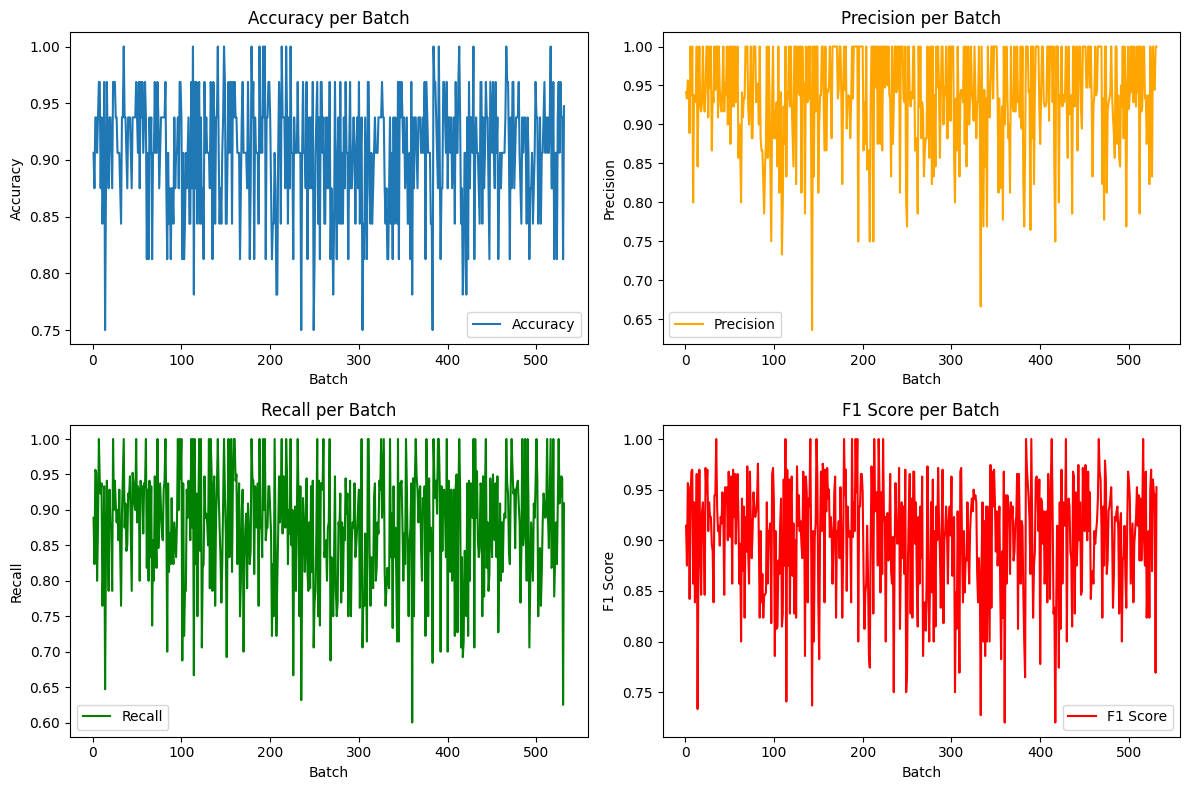

In [13]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Initialize lists to store metrics for each batch
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Loop through each batch in the validation set
for i in range(len(validation_generator)):
    x_batch, y_true_batch = validation_generator[i]
    y_pred_batch = model.predict(x_batch)
    
    # Convert predictions to binary values (0 or 1)
    y_pred_binary = (y_pred_batch > 0.5).astype("int32").flatten()
    y_true_binary = y_true_batch.flatten()
    
    # Calculate metrics for this batch
    acc = accuracy_score(y_true_binary, y_pred_binary)
    prec = precision_score(y_true_binary, y_pred_binary)
    rec = recall_score(y_true_binary, y_pred_binary)
    f1 = f1_score(y_true_binary, y_pred_binary)
    
    # Append metrics to lists
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

# Plot the metrics
epochs = range(1, len(accuracies) + 1)

plt.figure(figsize=(12, 8))

# Accuracy
plt.subplot(2, 2, 1)
plt.plot(epochs, accuracies, label="Accuracy")
plt.title("Accuracy per Batch")
plt.xlabel("Batch")
plt.ylabel("Accuracy")
plt.legend()

# Precision
plt.subplot(2, 2, 2)
plt.plot(epochs, precisions, label="Precision", color="orange")
plt.title("Precision per Batch")
plt.xlabel("Batch")
plt.ylabel("Precision")
plt.legend()

# Recall
plt.subplot(2, 2, 3)
plt.plot(epochs, recalls, label="Recall", color="green")
plt.title("Recall per Batch")
plt.xlabel("Batch")
plt.ylabel("Recall")
plt.legend()

# F1 Score
plt.subplot(2, 2, 4)
plt.plot(epochs, f1_scores, label="F1 Score", color="red")
plt.title("F1 Score per Batch")
plt.xlabel("Batch")
plt.ylabel("F1 Score")
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

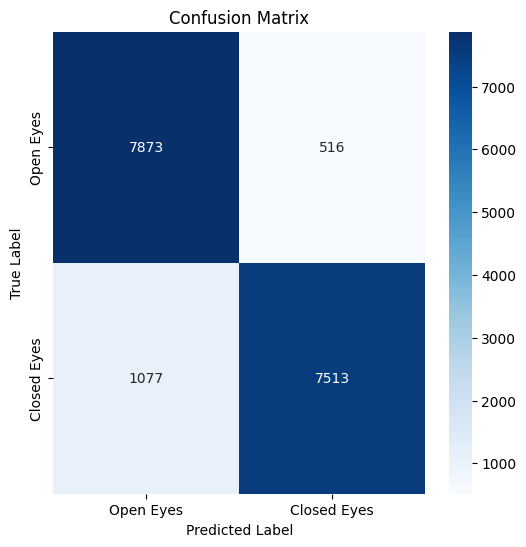

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Predict on the entire validation set
y_true = []
y_pred = []

# Loop through the validation generator to collect true labels and predictions
for i in range(len(validation_generator)):
    x_batch, y_true_batch = validation_generator[i]
    y_pred_batch = model.predict(x_batch)
    
    # Store predictions and true labels
    y_pred.extend((y_pred_batch > 0.5).astype("int32").flatten())
    y_true.extend(y_true_batch.flatten().astype("int32"))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)



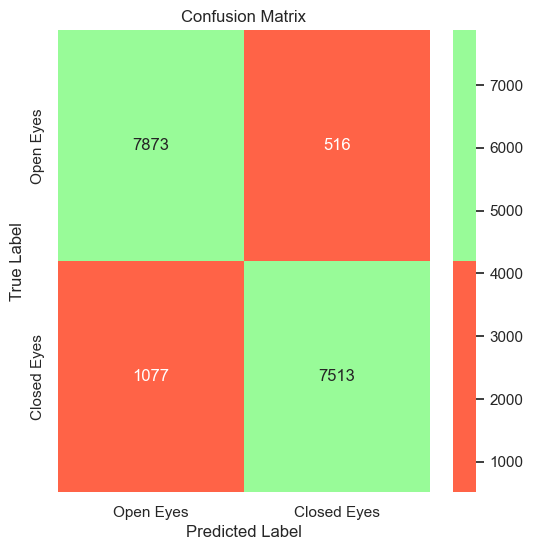

In [17]:
import seaborn as sns

sns.set(style='white')
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=sns.color_palette(['tomato', 'palegreen'], as_cmap=True), xticklabels=["Open Eyes", "Closed Eyes"], yticklabels=["Open Eyes", "Closed Eyes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()